In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat

# Question 1 - Density estimation: Psychological experiments.

## 1a
Form the 1-dimensional histogram and KDE to estimate the distributions1a - of amygdala and acc, respectively.

In [2]:
data = pd.read_csv('data/n90pol.csv').to_numpy()

In [3]:
def plothist(X, filename, xlabel='x axis'):
    bins, edges = np.histogram(X, bins='auto', density=True)
    min_a = edges[0]
    max_a = edges[-1]
    nbin = len(bins)
    cbin = (max_a - min_a) / nbin
    plt.figure()
    plt.bar(edges[:-1]+cbin/2, bins, width=cbin, align='center', alpha=0.8, edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.savefig(filename)
    return bins, edges

def get_kde_pdf(X, bw=0.01, min_x=None, max_x=None):
    kde = gaussian_kde(X,  bw_method=(bw / X.std(ddof=1)))
    if min_x is None:
        min_x = np.min(X)
    if max_x is None:
        max_x = np.max(X)
    xs = np.linspace(min_x, max_x, 100)
    return xs, kde.evaluate(xs), kde

def get_kde_pdf2(X, bw=0.01, min_x=None, max_x=None):
    print(X, bw)
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(X[:, None])
    #kde.fit(X[:, None])
    if min_x is None:
        min_x = np.min(X)
    if max_x is None:
        max_x = np.max(X)
    xs = np.linspace(min_x, max_x, 100)
    logprob = kde.score_samples(xs[:, None])
    prob = np.exp(logprob)
    return xs, prob, kde

def plot_density(x, y, filename, xlabel=None, ylabel=None, title=None, legend=None):
    plt.plot(x, y)
    if ylabel is not None:
        plt.ylabel('Density')
    if xlabel is not None:
        plt.xlabel(xlabel)
    if title is not None:
        plt.title(title)
    plt.savefig(filename)

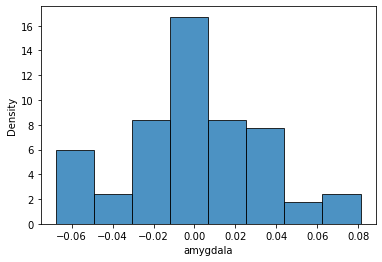

In [4]:
amy_bins, amy_edges = plothist(data[:, 0], 'data/HW3_Q1a_amygdala_hist.png', xlabel='amygdala')

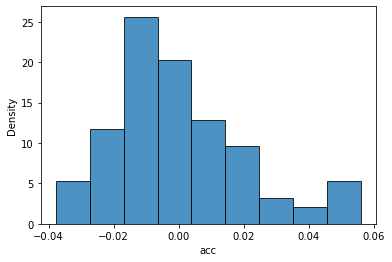

In [5]:
acc_bins, acc_edges = plothist(data[:, 1], 'data/HW3_Q1a_acc_hist.png', xlabel='acc')

[ 0.0051 -0.0674 -0.0257  0.0504  0.0125 -0.0024 -0.0262 -0.0032  0.0102
 -0.0676 -0.0553  0.0705  0.0016 -0.0103  0.0064  0.0301 -0.0334 -0.0049
 -0.0049 -0.0558  0.0029  0.0073 -0.058   0.0285 -0.0147  0.0123 -0.0091
  0.0173 -0.0562 -0.0041  0.043  -0.0475  0.0717 -0.0191  0.0164 -0.0307
 -0.0059 -0.0234  0.0252 -0.0546 -0.0109 -0.0205  0.0172 -0.0274  0.0029
  0.0238 -0.0135 -0.0073  0.0339 -0.0058  0.0068 -0.0131  0.0332 -0.0242
  0.0109  0.0252  0.0047  0.0486  0.0032 -0.0012 -0.0328 -0.0065  0.0054
 -0.0252  0.0263  0.0013 -0.0615  0.0284 -0.0026 -0.0111 -0.0271 -0.0057
 -0.0002  0.0262 -0.0232  0.0094 -0.0524  0.0517  0.0287  0.0352 -0.0123
 -0.0568  0.0403  0.0281  0.0812  0.0174  0.0251  0.0676 -0.0097  0.0374] 0.01


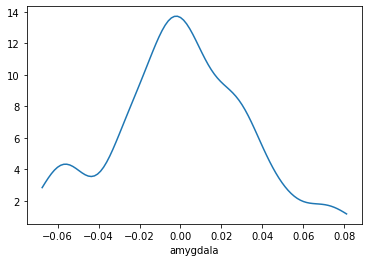

In [6]:
amy_x, amy_y, amy_kde = get_kde_pdf2(data[:, 0], bw=0.01)
plot_density(amy_x, amy_y, 'data/HW3_Q1a_amygdala_kde.png', xlabel='amygdala')

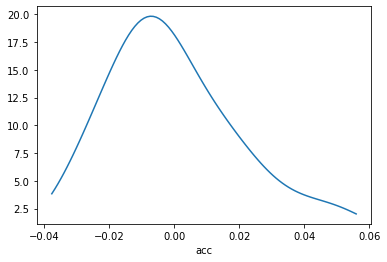

In [7]:
acc_x, acc_y, acc_kde = get_kde_pdf(data[:, 1], bw=0.01)
plot_density(acc_x, acc_y, 'data/HW3_Q1a_acc_kde.png', xlabel='acc')

## 1b 
Form 2-dimensional histogram for the pairs of variables (amygdala, acc).
Decide on a suitable number of bins so you can see the shape of the distribution clearly.
Also use kernel-density-estimation (KDE) to estimate the 2-dimensional density func-
tion of (amygdala, acc).

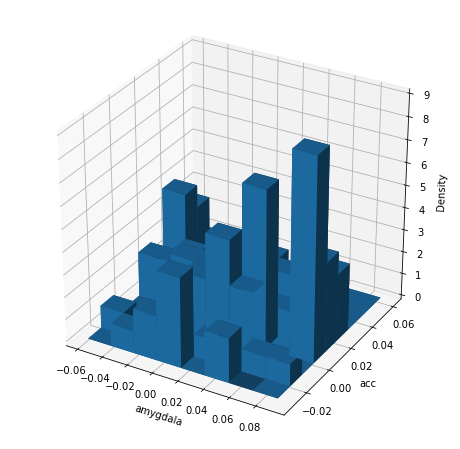

In [8]:
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], bins=[amy_edges, acc_edges])
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)
dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz )
ax.set_xlabel('amygdala')
ax.set_ylabel('acc')
ax.set_zlabel('Density')
fig.savefig('data/HW3_Q1b_hist2d.png')

In [9]:
def get_kde2d_pdf(X, bw = 0.01, xlabel='x axis', ylabel='y axis'):
    kde = gaussian_kde(X, bw_method=(bw / X.std(ddof=1)))
    n, m = X.shape
    xs = np.linspace(X[0,:].min(), X[0,:].max(), 100)
    ys = np.linspace(X[1,:].min(), X[1,:].max(), 100) 
    x,y = np.meshgrid(xs,ys)
    grid = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
    z = kde(grid.T)
    z = z.reshape(100,100)
    return x, y, z, kde

def plot_density_2d(x, y, z, filename, xlabel='x axis', ylabel='y axis', title=None):
    fig = plt.figure(figsize=(8,8))
    ax=fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_zlabel('Density')
    if title is not None:
        ax.set_title(title)
    fig.savefig(filename)
    

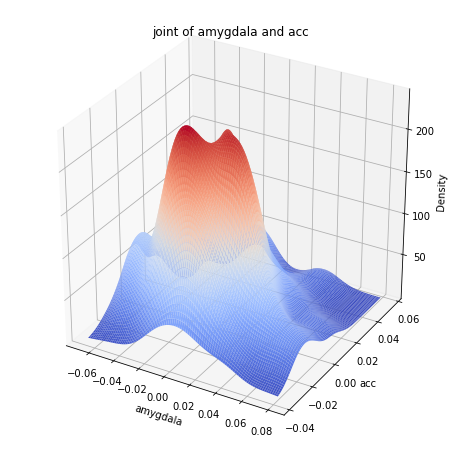

In [10]:
bx, by, bz, b_kde = get_kde2d_pdf(data[:,:2].T)
plot_density_2d(bx, by, bz,'data/HW3_Q1b_amy_acc_kde2d.png', xlabel='amygdala', ylabel='acc', title="joint of amygdala and acc")

## 1c

Using (a) and (b), using KDE estimators, verify whether or not the variables amygdala and acc are independent? You can tell this by checking do we approximately have p(amygdala, acc) = p(amygdala)p(acc)? To verify this, please show three plots: the map for p(amygdala, acc), the map for p(amygdala)p(acc) and the error map |p(amygdala, acc)−p(amygdala)p(acc)|. Comment on your results and whether this helps us to find out whether the two parts of brains (for emotions and decision-making) functions independently or they are related.

 ### p(amygdala, acc)

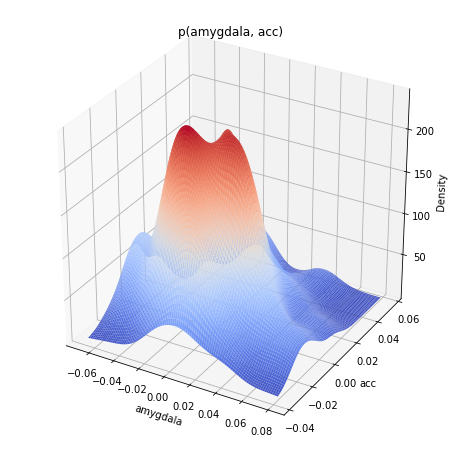

In [11]:
#grid = np.append(bx.reshape(-1,1),by.reshape(-1,1),axis=1)
#joint_prob = np.array([b_kde.integrate_box(x - 0.01, x) for x in grid])
#joint_prob = joint_prob.reshape(100, 100)
joint_prob = bz
plot_density_2d(bx, by, bz, 'data/HW3_Q1c_amy_acc_joint.png', xlabel='amygdala', ylabel='acc', title="p(amygdala, acc)")

### p(amygdala)p(acc)

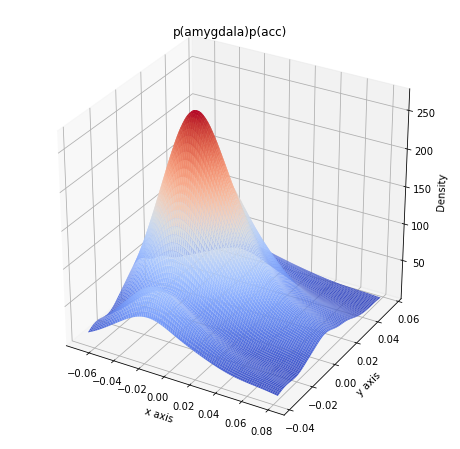

In [12]:
#amy_prob =  np.array([amy_kde.integrate_box_1d(x - 0.01, x) for x in amy_x])
#acc_prob =  np.array([acc_kde.integrate_box_1d(x - 0.01, x) for x in acc_x])
product_prob = np.outer(amy_y, acc_y)
plot_density_2d(bx, by, product_prob, 'data/HW3_Q1c_amy_acc_product.png', title='p(amygdala)p(acc)')

### p(amygdala, acc) - p(amygdala)p(acc)

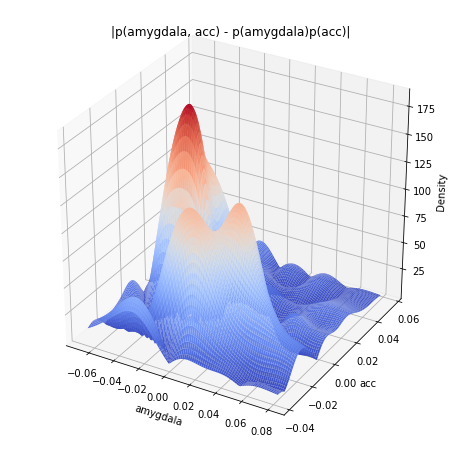

In [13]:
error_prob = np.abs(joint_prob - product_prob)
plot_density_2d(bx, by, error_prob, 'data/HW3_Q1c_amy_acc_error.png', xlabel='amygdala', ylabel='acc', title="|p(amygdala, acc) - p(amygdala)p(acc)|")

## 1d

Now we will consider the variable orientation. We will estimate the conditional distribution of the volume of the amygdala, conditioning on political orientation: p(amygdala|orientation = c), c = 2, . . . , 5. Do the same for the volume of the acc: Plot p(acc|orientation = c), c = 2, . . . , 5. You will use KDE to achieve the goal. (Note that the conditional distribution can be understood as fitting a distribution for the datawith the same (fixed) orientation. Thus there should be 4 one-dimensional distribution functions to show for this question.)

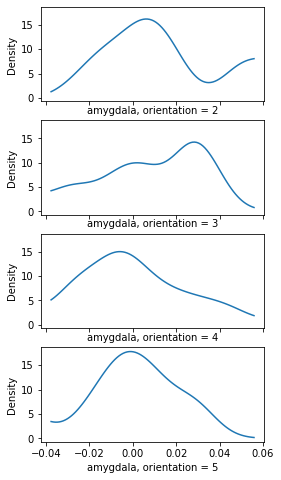

In [14]:
fig, ax = plt.subplots(4, 1, sharex=True, sharey=True, squeeze=True, figsize=(4, 8))
min_x = np.min(data[:, 1])
max_x = np.max(data[:, 1])
famy = {}
for i in range(2, 6):
    idx = np.where(data[:, 2] == i)
    famy_x, famy_pdf, famy_kde = get_kde_pdf(data[:, 0][idx], bw=0.01, min_x=min_x, max_x=max_x)
    famy[i] = {'x': famy_x, 'y': famy_pdf, 'kde': famy_kde}
    ax[i-2].plot(famy_x, famy_pdf, label=f"c={i}")
    ax[i-2].set_ylabel('Density')
    ax[i-2].set_xlabel(f"amygdala, orientation = {i}")
fig.savefig('data/HW3_Q1d_amygdala_kde_orientation.png')

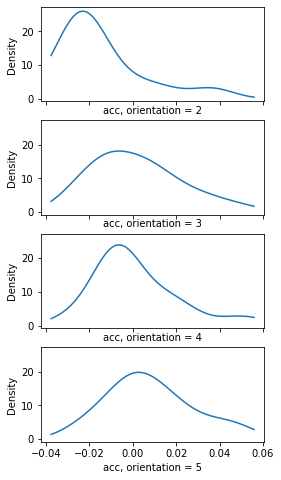

In [15]:
fig, ax = plt.subplots(4, 1, sharex=True, sharey=True, squeeze=True, figsize=(4, 8))
min_x = np.min(data[:, 1])
max_x = np.max(data[:, 1])
facc = {}
for i in range(2, 6):
    idx = np.where(data[:, 2] == i)
    facc_x, facc_pdf, facc_kde = get_kde_pdf(data[:, 1][idx], bw=0.01, min_x=min_x, max_x=max_x)
    facc[i] = {'x': facc_x, 'y': facc_pdf, 'kde': facc_kde}
    ax[i-2].plot(facc_x, facc_pdf, label=f"c={i}")
    ax[i-2].set_ylabel('Density')
    ax[i-2].set_xlabel(f"acc, orientation = {i}")
fig.savefig('data/HW3_Q1d_acc_kde_orientation.png')

## 1e 


Again we will consider the variable orientation. We will estimate the conditional joint distribution of the volume of the amygdala and acc, conditioning on a function of political orientation: p(amygdala, acc|orientation = c), c = 2, . . . , 5. You will use two-dimensional KDE to achieve the goal.

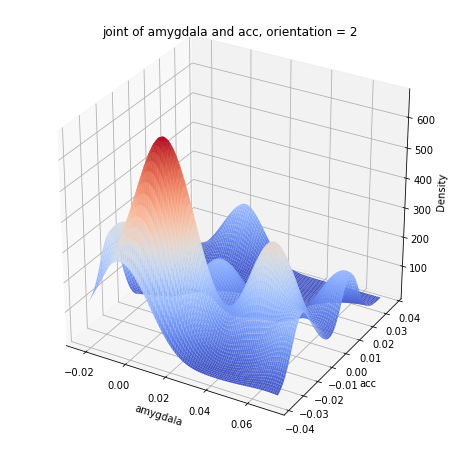

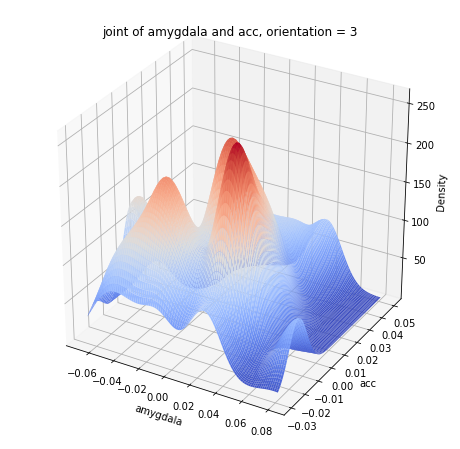

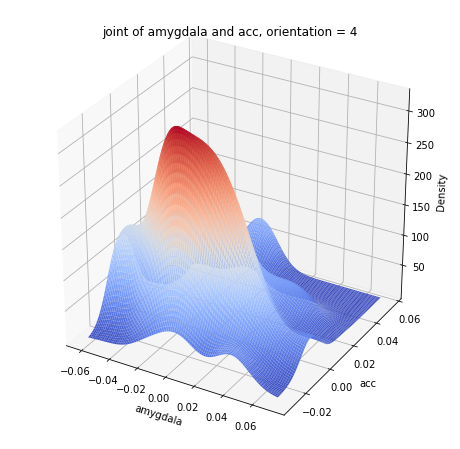

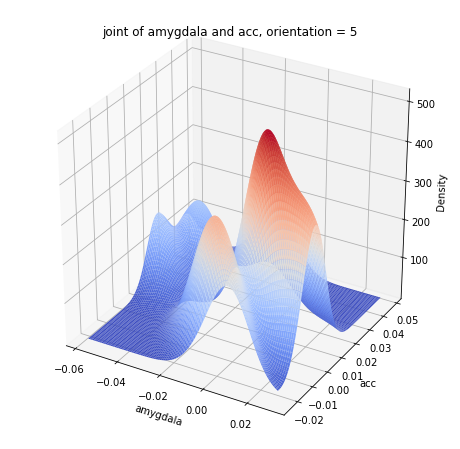

In [16]:
for i in range(2, 6):
    idx = np.where(data[:, 2] == i)
    cx, cy, cz, c_kde = get_kde2d_pdf(data[:,:2][idx].T, bw=0.01)
    plot_density_2d(cx, cy, cz, f'data/HW3_Q1e_amy_acc_kde2d_c={i}.png', xlabel='amygdala', ylabel='acc', title=f"joint of amygdala and acc, orientation = {i}")

## 1f

Using (d) and (e), evaluate whether or not the two variables are likely to be
conditionally independent. To verify this, please show three plots: the map for
p(amygdala, acc|orientation = c),
the map for
p(amygdala|orientation = c)p(acc|orientation = c)
and the error map
|p(amygdala, acc|orientation = c) − p(amygdala|orientation = c)p(acc|orientation = c)|,
c = 2, . . . , 5. Comment on your results and whether this helps us to find out whether
the two parts of brains (for emotions and decision-making) functions independently or
they are related, conditionally on the political orientation (i.e., considering different
types of personality).

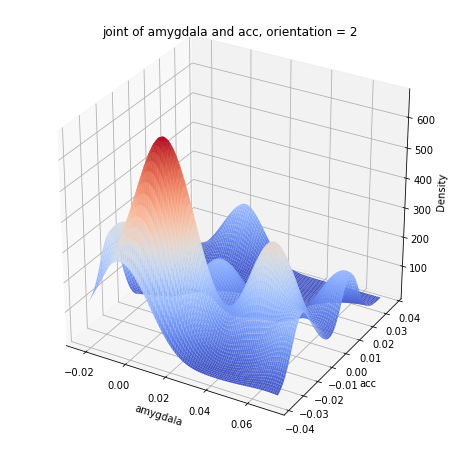

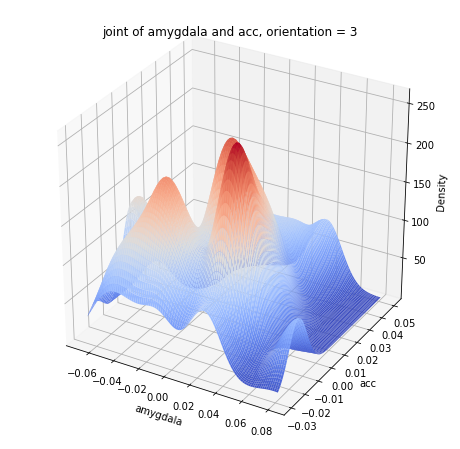

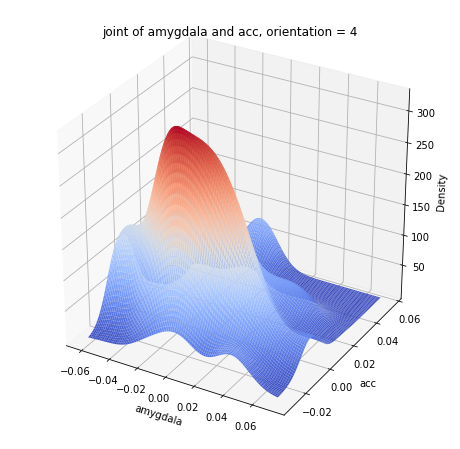

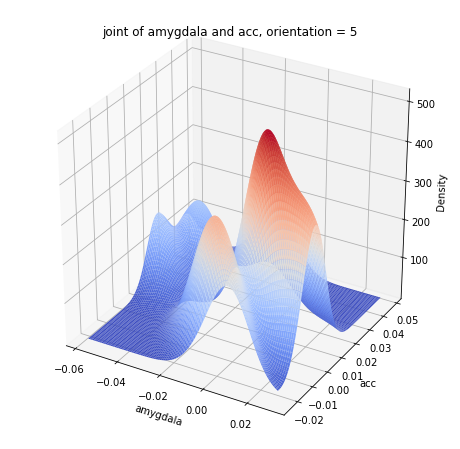

In [17]:
joint_probs = {}
for i in range(2, 6):
    idx = np.where(data[:, 2] == i)
    cx, cy, cz, c_kde = get_kde2d_pdf(data[:, :2][idx].T, bw=0.01)
    #grid = np.append(cx.reshape(-1, 1), cy.reshape(-1, 1), axis=1)
    #joint_prob = np.array([c_kde.integrate_box(x - 0.01, x) for x in grid])
    #joint_prob = joint_prob.reshape(100, 100)
    joint_prob = cz
    joint_probs[i] = joint_prob
    plot_density_2d(cx, cy, joint_prob, f'data/HW3_Q1f_amy_acc_kde2d_c={i}.png', xlabel='amygdala', ylabel='acc', title=f"joint of amygdala and acc, orientation = {i}")

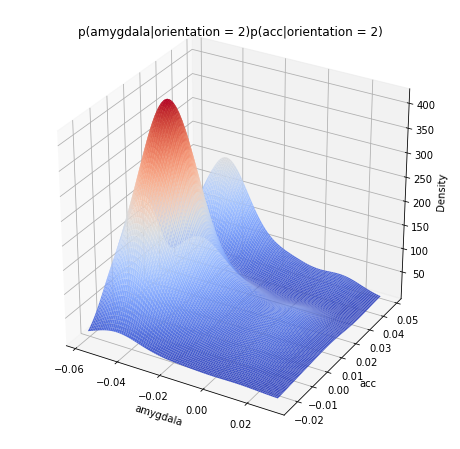

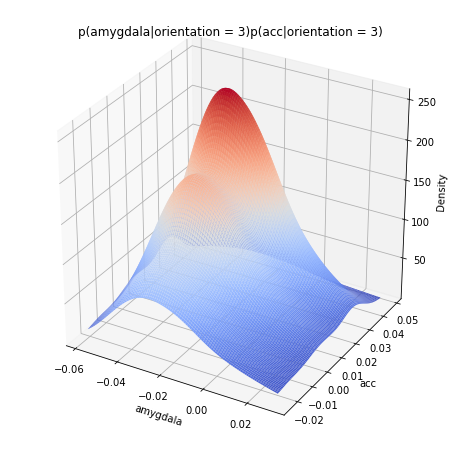

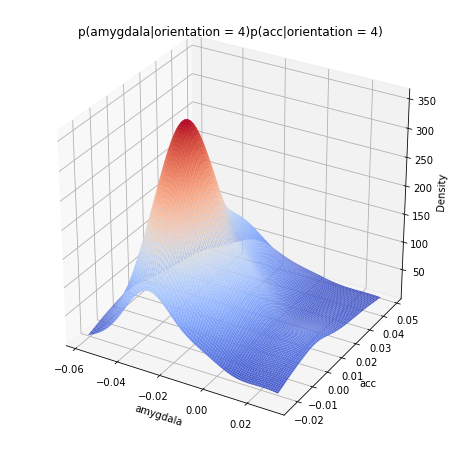

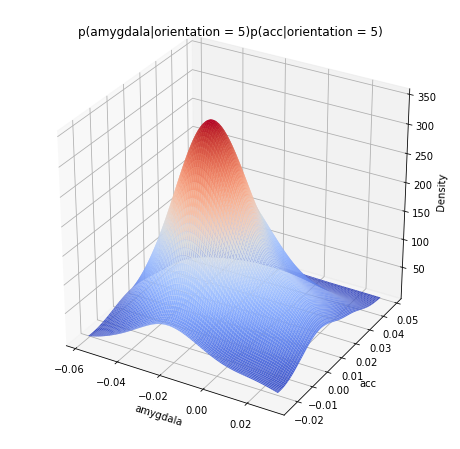

In [21]:
product_probs = {}
for i in range(2, 6):
    #famy_prob =  np.array([famy[i]['kde'].integrate_box_1d(x - 0.01, x) for x in famy[i]['x']])
    #facc_prob =  np.array([facc[i]['kde'].integrate_box_1d(x - 0.01, x) for x in facc[i]['y']]) 
    famy_y = famy[i]['y']
    facc_y = facc[i]['y']
    f_product_prob = np.outer(famy_y, facc_y)
    product_probs[i] = f_product_prob
    plot_density_2d(cx, cy, f_product_prob, f'data/HW3_Q1f_amy_acc_product_c={i}.png', xlabel='amygdala', ylabel='acc', title=f'p(amygdala|orientation = {i})p(acc|orientation = {i})')

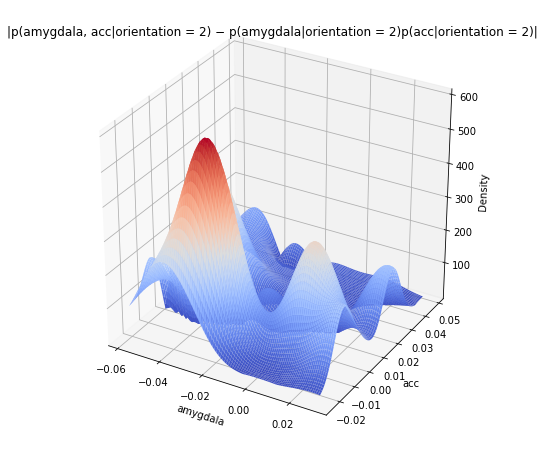

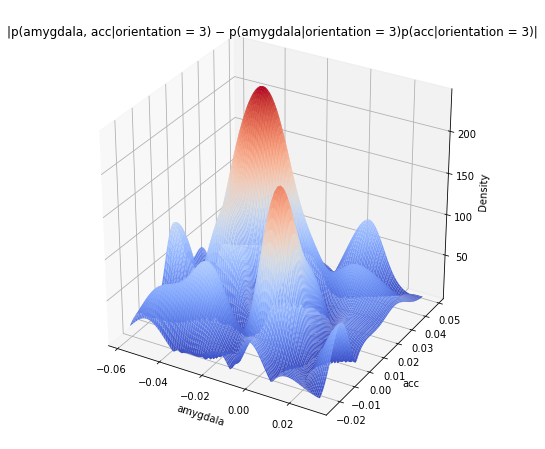

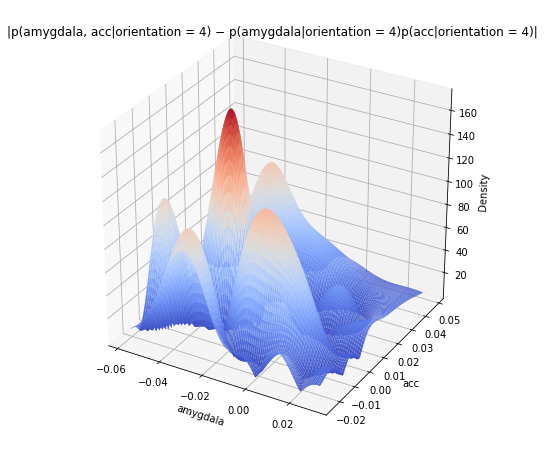

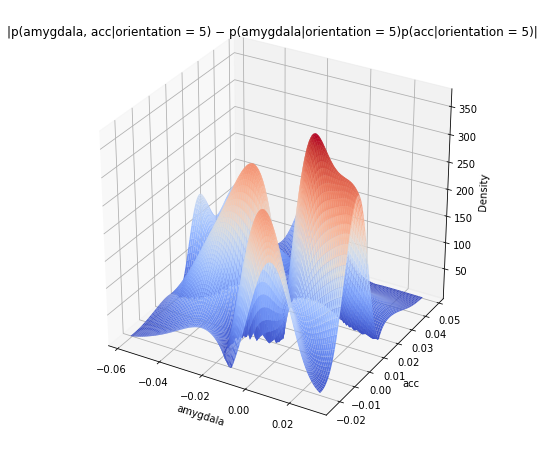

In [22]:
for i in range(2, 6):
    error_prob = np.abs(joint_probs[i] - product_probs[i])
    plot_density_2d(cx, cy, error_prob, f'data/HW3_Q1f_amy_acc_error_c={i}.png', xlabel='amygdala', ylabel='acc', title=f"|p(amygdala, acc|orientation = {i}) − p(amygdala|orientation = {i})p(acc|orientation = {i})|")